# Task 3 of Second Machine Learning Homework
## Learning Rate Analysis

**Dataset**: Use the same dataset from Problem 1.

**Task**: Modify the `gradient_descent()` function to include different learning rates (0.01, 0.1, 1.0). Visualize the convergence behaviors of gradient descent with each learning rate.

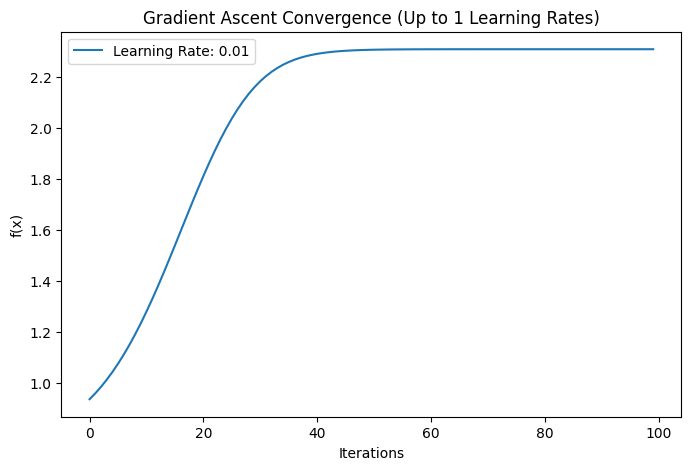

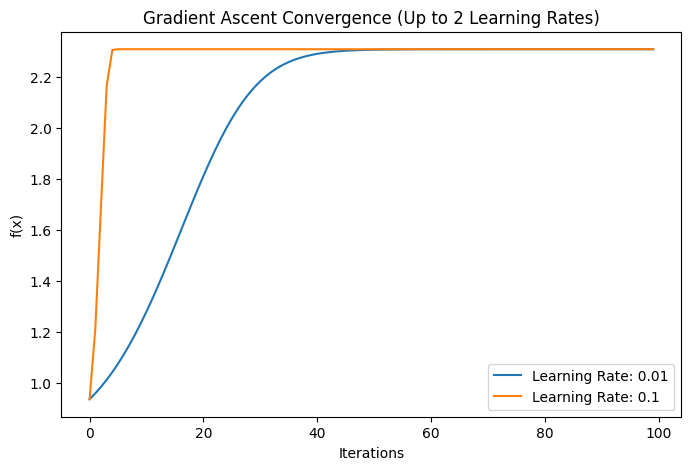

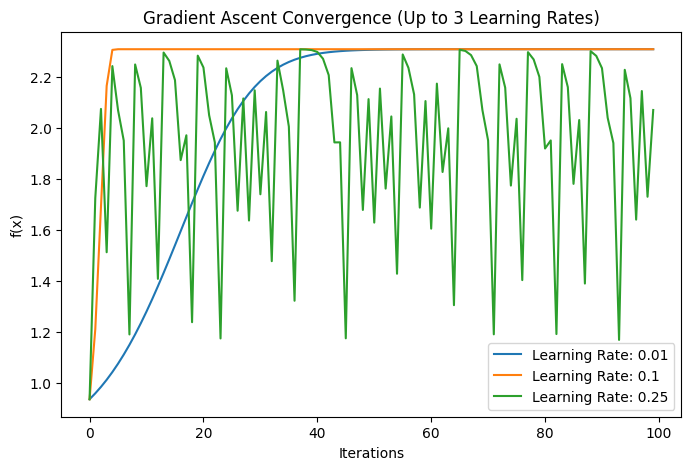

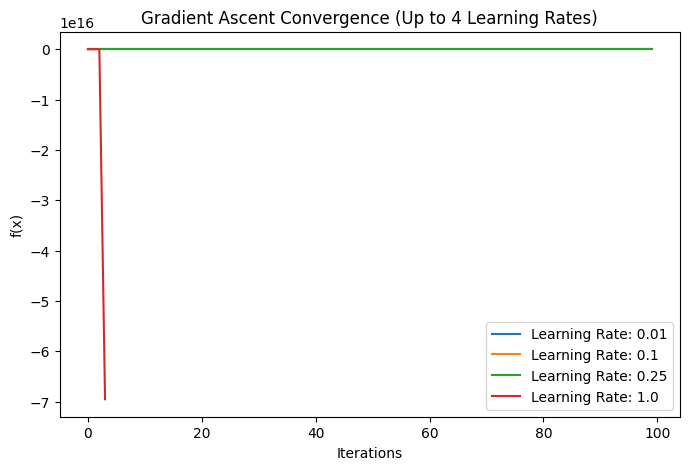

In [ ]:
import torch
import matplotlib.pyplot as plt

def f(x):
    return -x**4 + 4*x**2 - 2*x + 1

def gradient_descent(learning_rate, num_iter=100):
    x = torch.tensor([0.5], requires_grad=True)
    values = []

    for _ in range(num_iter):
        fx = f(x)
        values.append(fx.item())
        fx.backward()
        
        with torch.no_grad():
            x += learning_rate * x.grad
            x.grad.zero_()
    
    return values

learning_rates = [0.01, 0.1, 0.25, 1.0]
num_iter = 100

for i in range(1, len(learning_rates) + 1):
    plt.figure(figsize=(8, 5))
    for lr in learning_rates[:i]:
        values = gradient_descent(learning_rate=lr, num_iter=num_iter)
        plt.plot(values, label=f"Learning Rate: {lr}")
    plt.xlabel("Iterations")
    plt.ylabel("f(x)")
    plt.title(f"Gradient Ascent Convergence (Up to {i} Learning Rates)")
    plt.legend()
    plt.show()


I added additional value of 0.25. Over 4 learning rate values we have four different behaviours:
- 0.01 - We reach maximum slow and steady. Safe but slow solution.
- 0.1 - Optimal value for this task. We reach maximum in few iterations.
- 0.25 - Learning rate a bit too high, we can't stay on the optimal level (instead we oscilate around it)
- 1 - We don't converge at all because of way too high learning rate